# Profiling Aircraft On Time Preformance for climate-friendly planning.
# by Obum Onwudiwe

## Investigation Overview


This project aims to gain insights to short term strategies that can be implemented to aid solving the climate change challenge. It focuses on profiling delays associated with air travel with the aim of climate friendly planning around minimizing delays. Once an aircraft is scheduled to fly, a lot of events begin to happen on and around the aircraft - ground crew, airports, flight crew, etc. Delays cost airlines money and the extra fuel, use of airport facilities and other cascade effects have an impact on the environment.

## Dataset Overview

There are 1,048,575 flight records in each dataset with 29 features each. Most variables are numeric in nature, but the variables Unique Carrier, Tail num, Origin and Destination are string variables. The numeric variables are time lapses of evens associated with flight time and delays. Negative flight times were excluded.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
air_05 = pd.read_csv('2005.zip')

air_08 = pd.read_csv('2008.zip')

In [4]:
df08 = air_08.copy()

df05 = air_05.copy()

df05.drop_duplicates(inplace=True)

df08.drop_duplicates(inplace=True)

df05.columns = [str(col) + '05' for col in df05.columns]

df08.columns = [str(col) + '08' for col in df08.columns]

df05.fillna(0, inplace = True)
df08.fillna(0, inplace = True)

cols_times05 = ['DepTime05', 'ArrTime05', "ActualElapsedTime05", "CRSElapsedTime05", 'CarrierDelay05', 'WeatherDelay05', 'NASDelay05', 'SecurityDelay05', 'LateAircraftDelay05', "ArrDelay05", "DepDelay05", "TaxiIn05", 'TaxiOut05', 'AirTime05', 'DayofMonth05']
cols_times08 = ['DepTime08', 'ArrTime08', "ActualElapsedTime08", "CRSElapsedTime08", 'CarrierDelay08', 'WeatherDelay08', 'NASDelay08', 'SecurityDelay08', 'LateAircraftDelay08', "ArrDelay08", "DepDelay08", "TaxiIn08", 'TaxiOut08', 'AirTime08', 'DayofMonth08']

df05[cols_times05] = df05[cols_times05].astype('int64')
df08[cols_times08] = df08[cols_times08].astype('int64')

In [5]:
df_delay05 = df05.melt(id_vars=['UniqueCarrier05', 'ActualElapsedTime05', 'DepDelay05', 'ArrDelay05', 'Origin05', 'CancellationCode05', 'weekday_name05', 'TailNum05'], 
                          value_vars=['CarrierDelay05', 'WeatherDelay05', 'NASDelay05', 'SecurityDelay05', 'LateAircraftDelay05'], 
                          var_name='delays05', 
                          value_name='duration05')

df_delay08 = df08.melt(id_vars=['UniqueCarrier08', 'ActualElapsedTime08', 'DepDelay08', 'ArrDelay08', 'Origin08', 'CancellationCode08', 'weekday_name08', 'TailNum08'], 
                          value_vars=['CarrierDelay08', 'WeatherDelay08', 'NASDelay08', 'SecurityDelay08', 'LateAircraftDelay08'], 
                          var_name='delays08', 
                          value_name='duration08')

Airlines report the causes of delay in broad categories:

i. Air Carrier: within airline's control (maintenance, crew, cleaning, baggage loading, fueling).

ii. Extreme Weather: Significant meteorological conditions (actual/forecasted) in the judgment of the carrier.

iii. National Aviation System (NAS): non-extreme weather, airport operations, heavy traffic volume, air traffic control.

iv. Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.

v. Security: evacuation, re-boarding due to security breach, screening equipment, lines over 29 minutes at screening.


# Distribution of delay count - Where do delays come from?

Distribution of the count of each cause of delays, not the duration of the delays. A flight is considered delayed if more than 15 mins elapses after its scheduled time. The plot is scaled to the proportion of each delay to the total count. NAS delays represents a broad range of factors attributable to national aviation systems. NAS delays show the highest decrease from 2005 to 2008 (about 3% drop), while late aircraft delays show the highest increase (over 5%). These delay causes cut across both arrivals and departures.

In [6]:
df_delay05 = df_delay05.loc[df_delay05['duration05'] >= 15]
df_delay08 = df_delay08.loc[df_delay08['duration08'] >= 15]

delay_counts05 = df_delay05['delays05'].value_counts()
delay_order05 = delay_counts05.index
n_delay05 = df_delay05['delays05'].value_counts().sum()
max_delay_count05 = delay_counts05[0]
max_prop05 = max_delay_count05 / n_delay05

delay_counts08 = df_delay08['delays08'].value_counts()
delay_order08 = delay_counts08.index
n_delay08 = df_delay08['delays08'].value_counts().sum()
max_delay_count08 = delay_counts08[0]
max_prop08 = max_delay_count08 / n_delay08

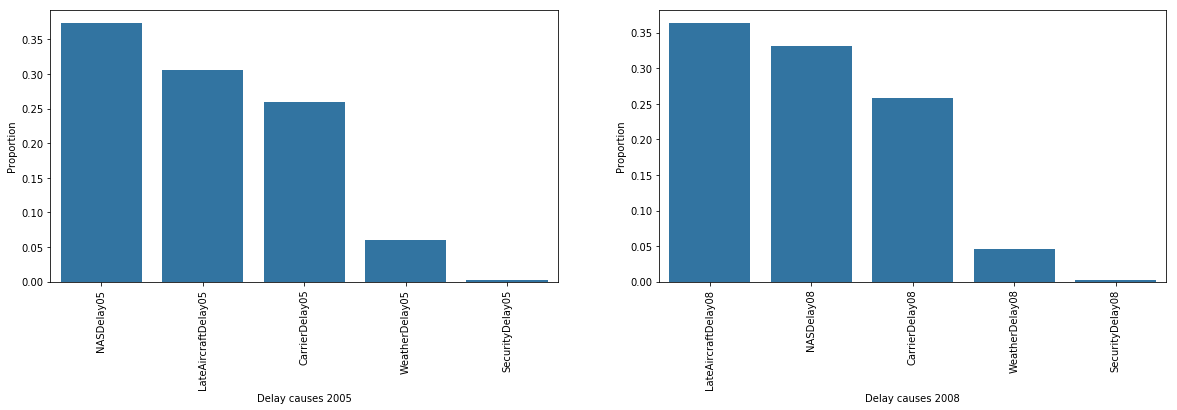

In [7]:
plt.figure(figsize = [20, 5]) 
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
tick_props05 = np.arange(0, max_prop05, 0.05)
tick_names05 = ['{:0.2f}'.format(v) for v in tick_props05]
sb.countplot(data=df_delay05, x='delays05', color=base_color, order = delay_order05)
plt.xticks(rotation=90)
plt.yticks(tick_props05 * n_delay05, tick_names05)
plt.xlabel('Delay causes 2005')
plt.ylabel('Proportion');

plt.subplot(1, 2, 2)
tick_props08 = np.arange(0, max_prop08, 0.05)
tick_names08 = ['{:0.2f}'.format(v) for v in tick_props08]
sb.countplot(data=df_delay08, x='delays08', color=base_color, order = delay_order08)
plt.yticks(tick_props08 * n_delay08, tick_names08)
plt.xticks(rotation=90)
plt.xlabel('Delay causes 2008')
plt.ylabel('Proportion');

# Distribution of average duration of a delay - How long do delays last?

Weather delays had the highest average duration. Carrier delays have a lower average duration but have a wider stretch, with maximum values higher than late aircraft delays. NAS delays which have the highest count of delays(35%), has one of the lower average duration (less than 40 mins) compared to around 60 mins for weather with 5% count. This is in contrast with the earlier bar chart that shows NAS delay having the highest count of delays but seen here with the fourth highest mean. The extension to the negative indicate flights that operated earlier than scheduled but attributed to that cause.

In [8]:
THRESHOLD = 1
delay_frequency = df_delay05['delays05'].value_counts()
idx = np.sum(delay_frequency > THRESHOLD)
most_delays = delay_frequency.index[:idx]
dist_delays = df_delay05.loc[df_delay05['delays05'].isin(most_delays)]
delay_means = dist_delays.groupby('delays05').mean()
dur_order = delay_means.sort_values('duration05', ascending = False).index

delay_frequency08 = df_delay08['delays08'].value_counts()
idx08 = np.sum(delay_frequency08 > THRESHOLD)
most_delays08 = delay_frequency08.index[:idx08]
dist_delays08 = df_delay08.loc[df_delay08['delays08'].isin(most_delays08)]
delay_mean08 = dist_delays08.groupby('delays08').mean()
dur_order08 = delay_mean08.sort_values('duration08', ascending = False).index

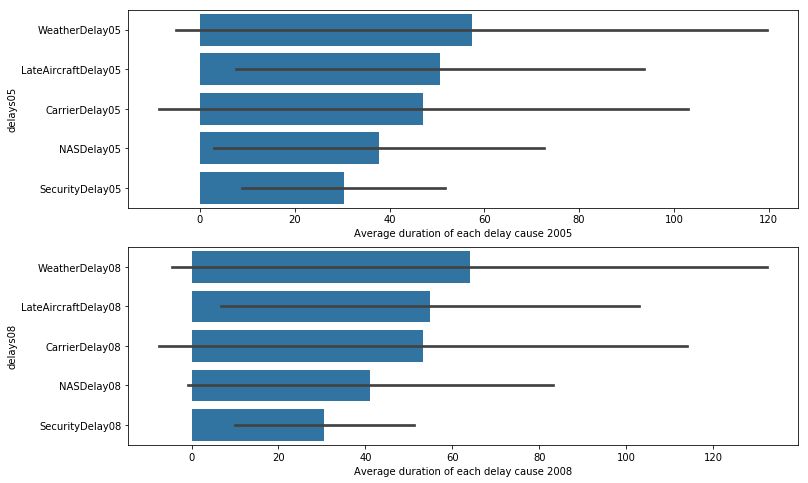

In [9]:
plt.figure(figsize = [12, 8])

plt.subplot(2, 1, 1)
base_color = sb.color_palette()[0]

sb.barplot(data = dist_delays, x = 'duration05', y = 'delays05', color = base_color, order = dur_order, ci = 'sd')
plt.xlabel('Average duration of each delay cause 2005')

plt.subplot(2, 1, 2)
sb.barplot(data = dist_delays08, x = 'duration08', y = 'delays08', color = base_color, order = dur_order08, ci = 'sd')
plt.xlabel('Average duration of each delay cause 2008');

## Airline delay across all causes - What is the average time an airline spends on delays?

The box plot shows the distribution of airline flight times to make comparisons with delay durations. Elapsed times are affected by length of delays. Airlines with similar average flight durations do not have significant corellation with average duration of delays, as plotted with the bar plot. Airlines WN and OO have similar flight times but not so with the delay average.

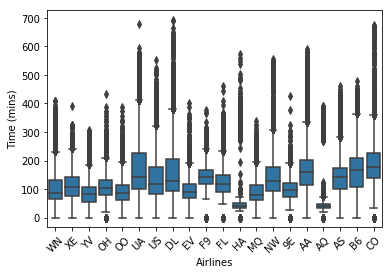

In [10]:
sb.boxplot(data=df08, x='UniqueCarrier08', y='ActualElapsedTime08', color = base_color)
plt.xticks(rotation = 45)
plt.xlabel('Airlines')
plt.ylabel('Time (mins)');

In [11]:
THRESHOLD = 500
carr_frequency = df_delay08['UniqueCarrier08'].value_counts()
idx = np.sum(carr_frequency > THRESHOLD)
most_flyers = carr_frequency.index[:idx]
high_flyers = df_delay08.loc[df_delay08['UniqueCarrier08'].isin(most_flyers)]
fly_means = high_flyers.groupby('UniqueCarrier08').mean()
comb_order = fly_means.sort_values('duration08', ascending = False).index

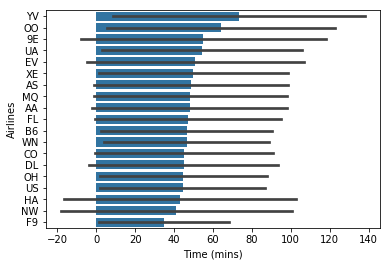

In [12]:
base_color = sb.color_palette()[0]
sb.barplot(data = high_flyers, x = 'duration08', y = 'UniqueCarrier08',
color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Time (mins)')
plt.ylabel('Airlines');

# Delay cause by airline - What makes up these averages?

The breakdown of each airline by delay cause is plotted with clustered bars, to show the contribution of each delay cause to the airline on average. Weather delays account for about 5% of total delay count, but have a huge impact when they occur. OO has higher average weather and NAS delays compared with WN. For perspective the stacked chart shows the cumulative contributions for each airline.

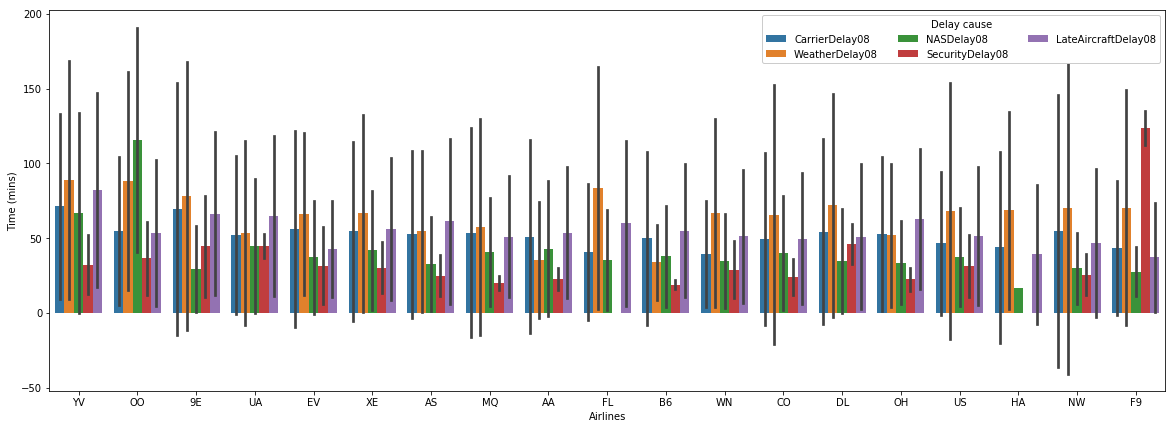

In [13]:
plt.figure(figsize = [20, 7]) 
fly_mean = high_flyers.groupby('UniqueCarrier08').mean()
carr_order = fly_mean.sort_values('duration08', ascending = False).index
ax = sb.barplot(data = high_flyers, x = 'UniqueCarrier08', y = 'duration08', hue = 'delays08', order = carr_order, ci = 'sd')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'Delay cause')
plt.xlabel('Airlines')
plt.ylabel('Time (mins)');

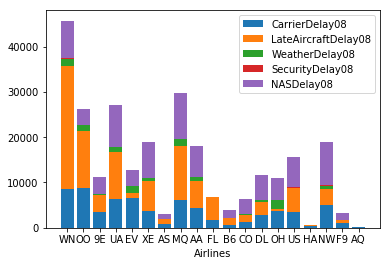

In [14]:
cat1_order = ['WN', 'OO', '9E', 'UA', 'EV', 'XE', 'AS', 'MQ', 'AA', 'FL', 'B6', 'CO', 'DL', 'OH', 'US', 'HA', 'NW', 'F9', 'AQ']
cat2_order = ['CarrierDelay08', 'LateAircraftDelay08', 'WeatherDelay08', 'SecurityDelay08', 'NASDelay08']

baselines = np.zeros(len(cat1_order))
# for each second-variable category:
for i in range(len(cat2_order)):
    # isolate the counts of the first category,
    cat2 = cat2_order[i]
    inner_counts = df_delay08[df_delay08['delays08'] == cat2]['UniqueCarrier08'].value_counts()
    # then plot those counts on top of the accumulated baseline
    plt.bar(x = np.arange(len(cat1_order)), height = inner_counts[cat1_order],
            bottom = baselines)
    baselines += inner_counts[cat1_order]

plt.xticks(np.arange(len(cat1_order)), cat1_order)
plt.legend(cat2_order)
plt.xlabel('Airlines');

A heat map is used to give annotations to the average length of a delay by airline. From the barplot of airline average delays, airline AA has a higher average than DL, but AA's numbers appear better than DL. It turns out that AA had a higher count of aircraft delays greater than 15 minutes in 2008 (about 18000 to less 12000 for DL), although DL had a higher count of aircraft flights (56000 to 51000).

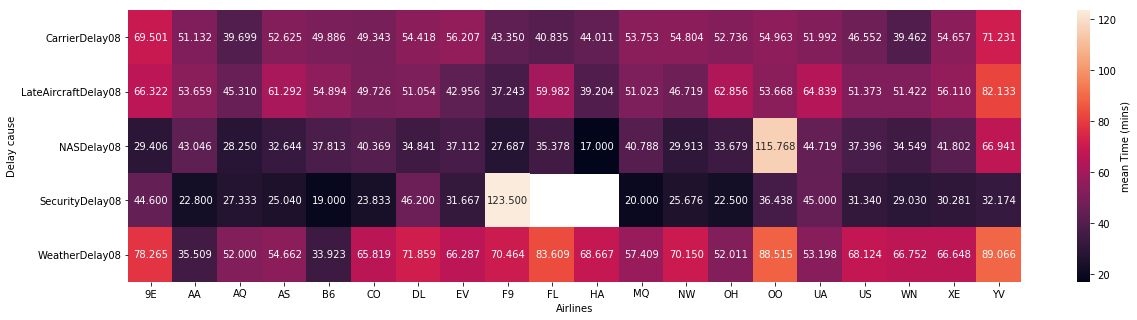

In [15]:
THRESHOLD = 200
carr_frequency = df_delay08['UniqueCarrier08'].value_counts()
idx = np.sum(carr_frequency > THRESHOLD)
most_carr = carr_frequency.index[:idx]
Airline_delay = df_delay08.loc[df_delay08['UniqueCarrier08'].isin(most_carr)]
Airline_means = Airline_delay.groupby('UniqueCarrier08').mean()
airline_order = Airline_means.sort_values('duration08', ascending = False).index

plt.figure(figsize = [20, 5])

cat_means = Airline_delay.groupby(['UniqueCarrier08', 'delays08']).mean()['duration08']
cat_means = cat_means.reset_index(name = 'airline_order')
cat_means = cat_means.pivot(index = 'delays08', columns = 'UniqueCarrier08',
                            values = 'airline_order')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean Time (mins)'})
plt.xlabel('Airlines')
plt.ylabel('Delay cause');

Analysis can be extended to delays at aircraft and airport levels to get insights on patterns and used to narrow down strategies for airline managers and regulatory bodies for short term contributions through climate friendly planning; minimizing or eliminating delays will go a long way in reducing the impact of aviation related activities on the climate.  

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_II_slide_deck_template.ipynb'])

0

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 526611 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/